#  Car Price Analysis – Novanectar Internship Project


In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [77]:
# loading the dataset
df = pd.read_csv("C:\\Users\\63726\\Downloads\\CarPrice_Assignment.csv")
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [78]:
# checking for null values
df.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [79]:
# extract brand name from CarName column
df['carCompany'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Fix spelling errors in car brands
df['carCompany'] = df['carCompany'].replace({
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'maxda': 'mazda',
    'alfa-romero': 'alfa-romeo'
})


In [80]:
# drop ID and original CarName columns
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

In [81]:
df = pd.get_dummies(df, drop_first=True)

In [82]:
df['car_stability'] = df['wheelbase'] / df['carlength']

In [83]:
# removing highly correlated features
df.drop(['carlength', 'carwidth', 'curbweight', 'wheelbase', 'highwaympg', 'car_stability'], axis=1, inplace=True)


##  Data Visualization
We’ll now explore the dataset visually using a **pairplot**, **heatmap**, **histogram**, and a **bar chart** for brand-wise average price.


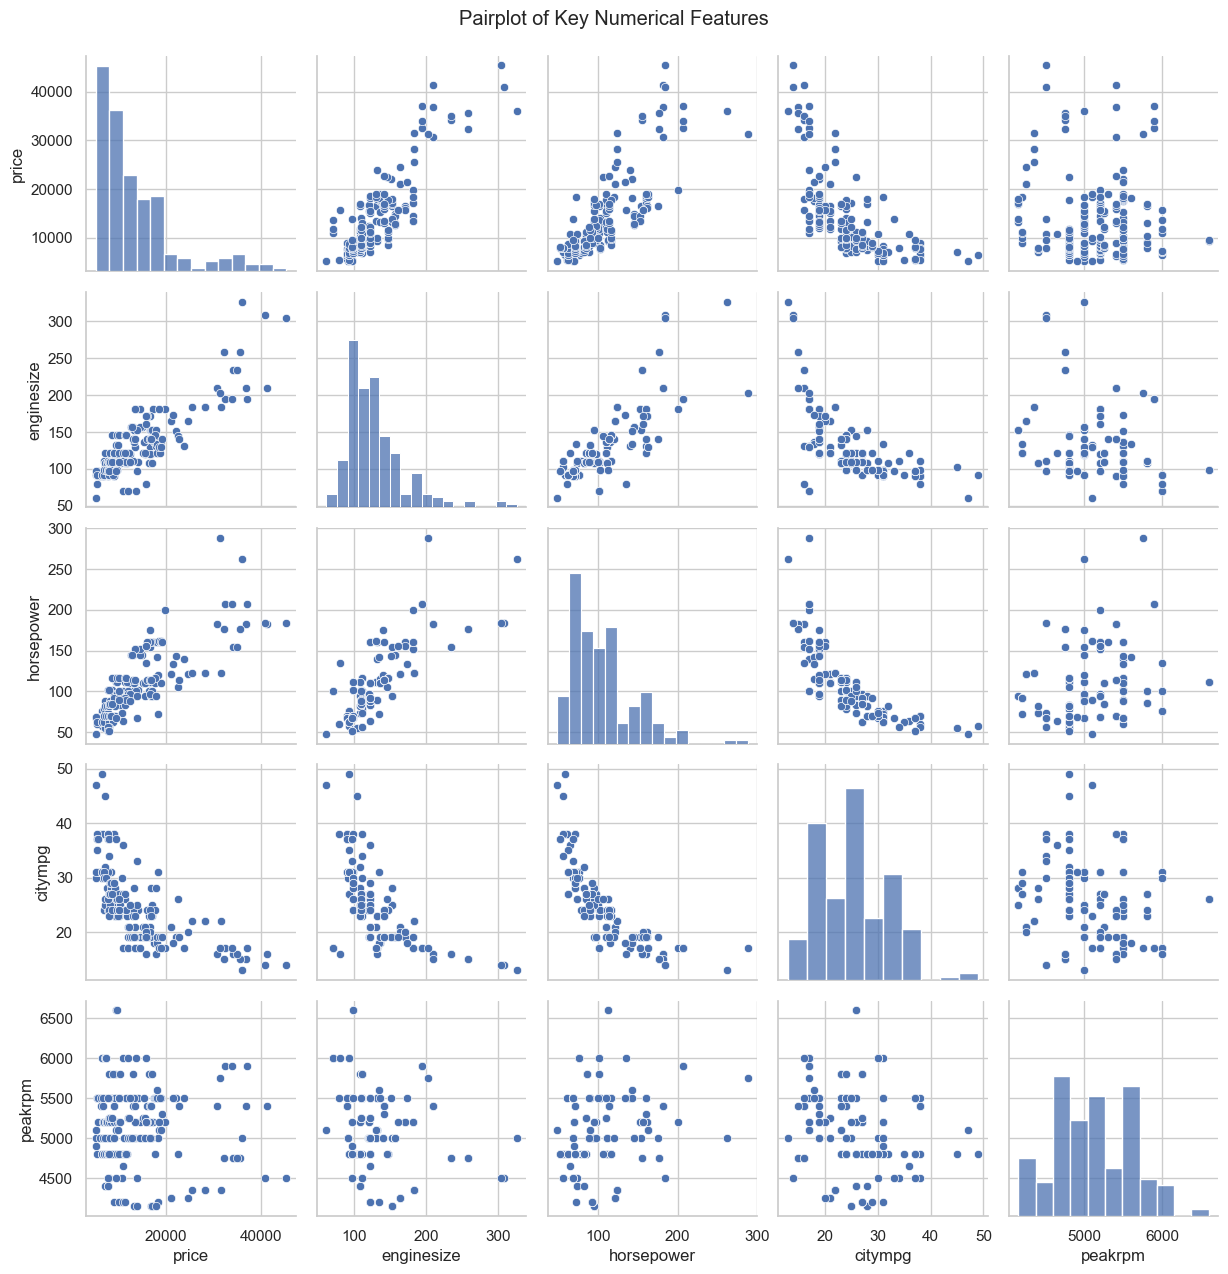

In [84]:
# selecting a few numerical features to avoid messy
pair_df = df[['price', 'enginesize', 'horsepower', 'citympg', 'peakrpm']]

# pairplot 
sns.pairplot(pair_df)
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.savefig('pairplot.png') # to save
plt.show()


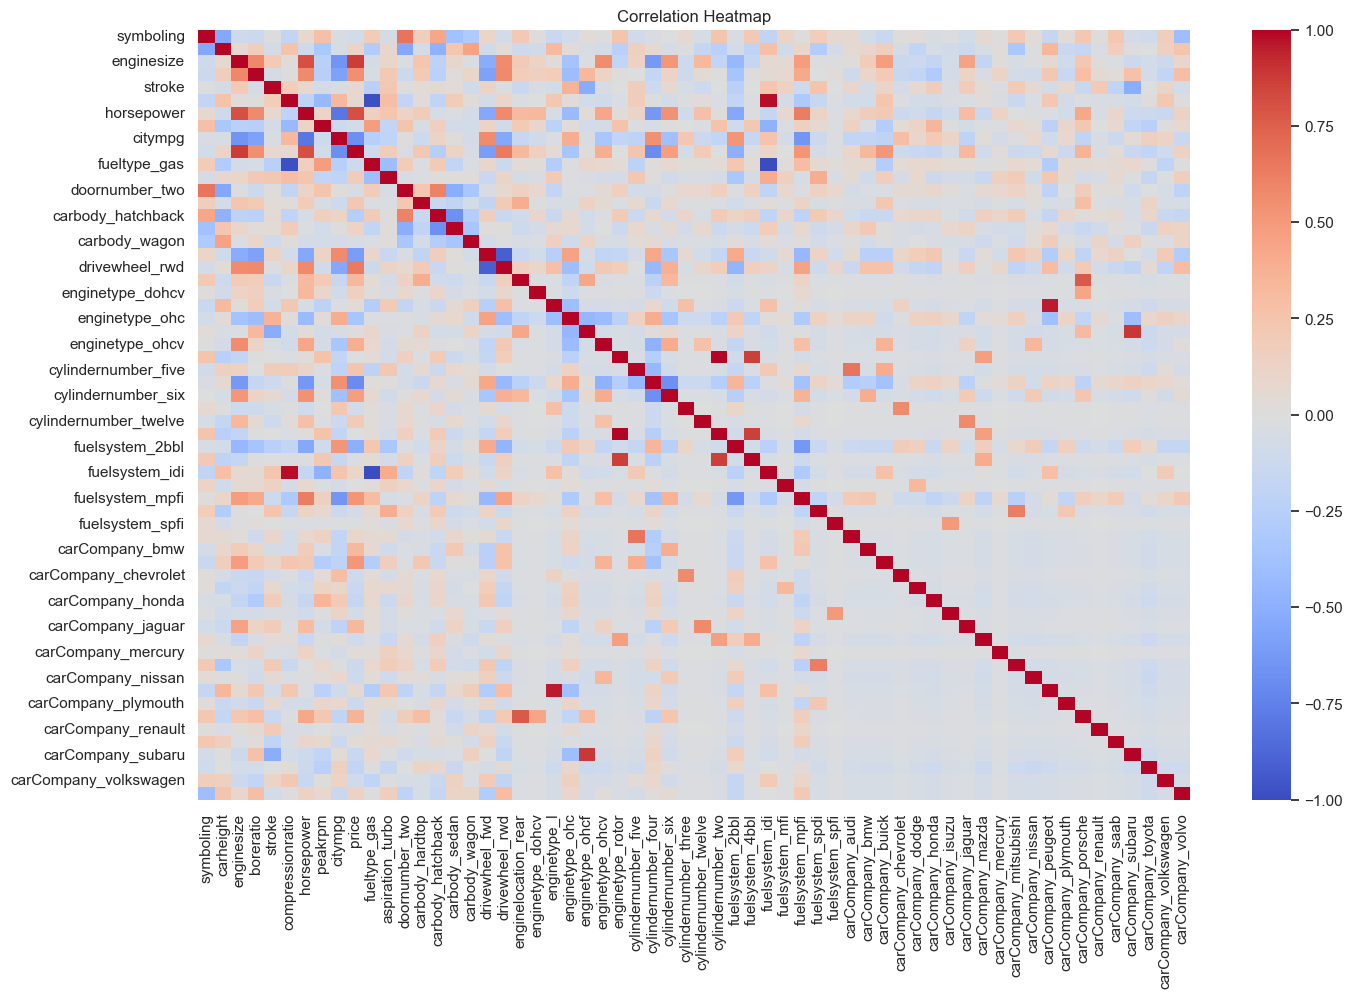

In [85]:
# correlation heatmap 
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.savefig('heatmap') # To save
plt.show()


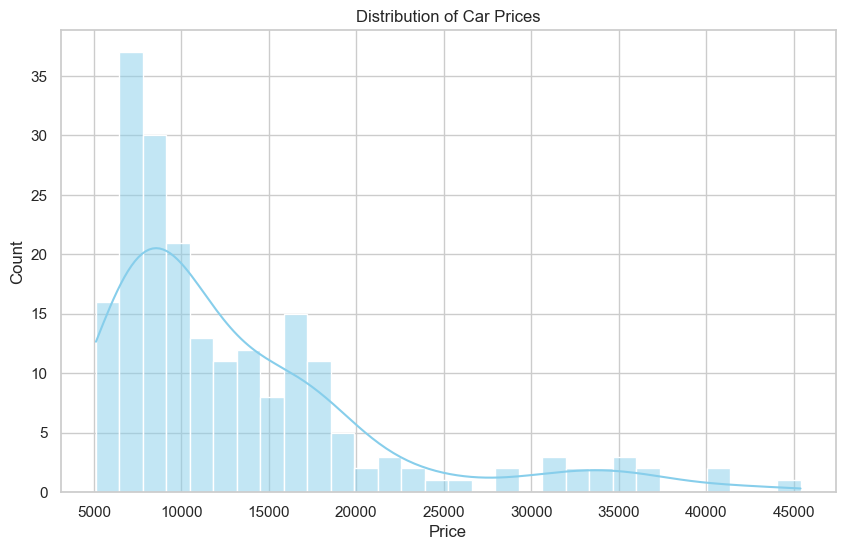

In [86]:
# histogram 
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.savefig('histogram.png') #to save
plt.show()


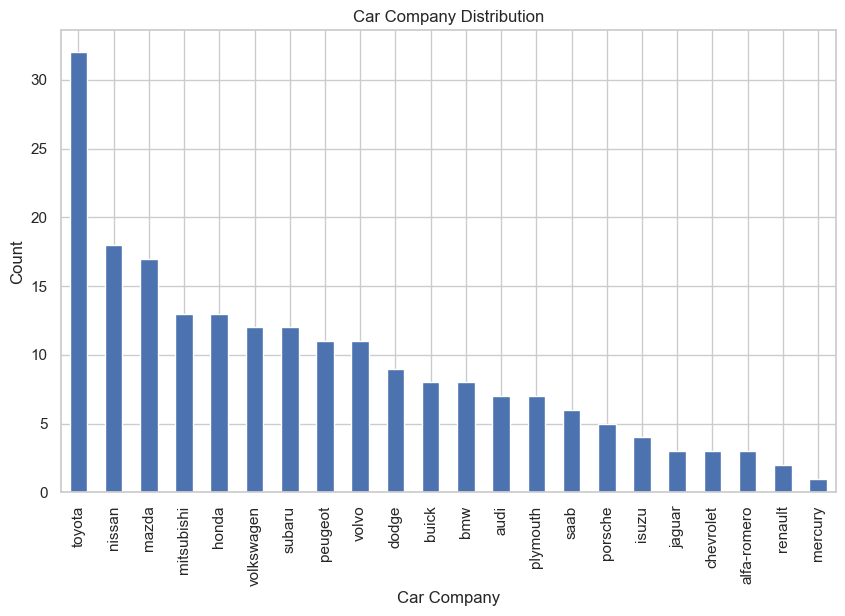

In [87]:
df_original = pd.read_csv('C:\\Users\\63726\\Downloads\\CarPrice_Assignment.csv') 
df_original['carCompany'] = df_original['CarName'].apply(lambda x: x.split()[0])
df_original['carCompany'] = df_original['carCompany'].replace({
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
})

# To plot bar chart 

plt.figure(figsize=(10, 6))
df_original['carCompany'].value_counts().plot(kind='bar')
plt.title('Car Company Distribution')
plt.xlabel('Car Company')
plt.ylabel('Count')
plt.savefig('barchart.png')  # To save 
plt.show()

##  Visual Insights 
### Heatmap Observations:
By examining the correlation heatmap, we found that certain numerical features had very strong correlations with each other — particularly:
- `carlength`, `curbweight`, `wheelbase`, and `carwidth` were tightly linked.
- Keeping all of them would introduce multicollinearity in any future predictive model.

To simplify the dataset and avoid redundancy, we removed most of these highly correlated features and retained only the most relevant ones.

---

### Histogram 
The price distribution of cars in the dataset is skewed to the right:
- Most cars are priced in the **lower to mid-range segment**, between $5,000 and $15,000.
- A small number of **premium or luxury cars** (like BMW, Porsche) drive the average up but appear less frequently.

This highlights a common trend: the majority of consumers opt for budget to mid-tier vehicles.

---

###  Bar Chart
The brand-wise analysis shows clear pricing tiers:
- **Luxury brands** such as **Jaguar, Porsche, BMW, and Audi** have the **highest average prices**.
- On the other end, brands like **Honda, Mazda, and Chevrolet** are more affordable and consistent with entry-level price points.

This indicates that brand identity significantly influences pricing — even when other specifications may be similar.

---

The combination of heatmap, histogram, and bar chart provided a clear picture of which features — and which brands — influence car prices. These insights are useful not only for data modeling but also for business decisions related to market positioning and target segments.


##  Final Insights & Report

This project focused on analyzing all the features of various cars to understand what influences the market prices. Here are the findings:
- **Engine size** is the most important factor influencing price.
- **City mileage (MPG)** is negatively correlated with price. Higher mileage usually means a more budget-friendly vehicle.
- **Luxury brands** like BMW, Porsche, and Jaguar tend to have  higher prices on average.
- The dataset had **no missing values**, which made the cleaning process more efficient and easy.
- Several features like `wheelbase`, `carlength`, `curbweight`, and `highwaympg` were dropped due to high correlation with other variables.
- Dummy variables were created to convert categorical features into numeric format for analysis.

The project is now ready for deployment into further machine learning workflows or business dashboards.

---

**Submitted to:** Novanectar Pvt Ltd  
**Intern:** [Ashish sahu]  
**Date:** 23/05/2025
